In [11]:
# We first run the example from the tutorial website 
#(Note that it is a letter by letter copy and the goal is to ensure that the initial set up is okay)
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


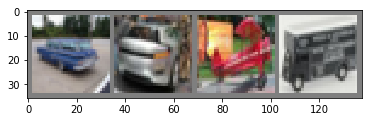

  car   car plane truck


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.271
[1,  4000] loss: 1.961
[1,  6000] loss: 1.723
[1,  8000] loss: 1.621
[1, 10000] loss: 1.554
[1, 12000] loss: 1.489
[2,  2000] loss: 1.436
[2,  4000] loss: 1.411
[2,  6000] loss: 1.369
[2,  8000] loss: 1.360
[2, 10000] loss: 1.319
[2, 12000] loss: 1.310
Finished Training


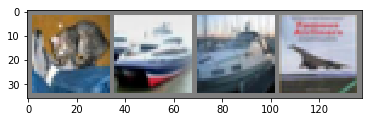

GroundTruth:    cat  ship  ship plane


In [7]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [8]:
outputs = net(images)

In [9]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car  ship


In [10]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 53 %


[1,  2000] loss: 1.989
[1,  4000] loss: 1.929
[1,  6000] loss: 1.919
[1,  8000] loss: 1.903
[1, 10000] loss: 1.883
[1, 12000] loss: 1.868
[2,  2000] loss: 1.832
[2,  4000] loss: 1.878
[2,  6000] loss: 1.856
[2,  8000] loss: 1.843
[2, 10000] loss: 1.872
[2, 12000] loss: 1.842
[3,  2000] loss: 1.821
[3,  4000] loss: 1.843
[3,  6000] loss: 1.842
[3,  8000] loss: 1.834
[3, 10000] loss: 1.837
[3, 12000] loss: 1.826
[4,  2000] loss: 1.802
[4,  4000] loss: 1.810
[4,  6000] loss: 1.822
[4,  8000] loss: 1.827
[4, 10000] loss: 1.827
[4, 12000] loss: 1.851
[5,  2000] loss: 1.786
[5,  4000] loss: 1.787
[5,  6000] loss: 1.819
[5,  8000] loss: 1.851
[5, 10000] loss: 1.814
[5, 12000] loss: 1.838
[6,  2000] loss: 1.767
[6,  4000] loss: 1.811
[6,  6000] loss: 1.792
[6,  8000] loss: 1.813
[6, 10000] loss: 1.827
[6, 12000] loss: 1.829
[7,  2000] loss: 1.785
[7,  4000] loss: 1.801
[7,  6000] loss: 1.791
[7,  8000] loss: 1.805
[7, 10000] loss: 1.823
[7, 12000] loss: 1.805
[8,  2000] loss: 1.750
[8,  4000] 

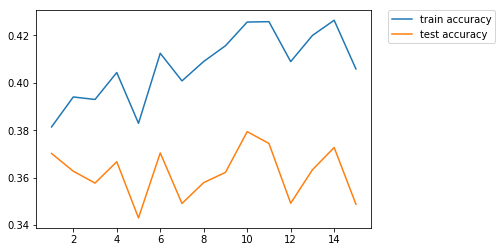

In [16]:
# the actual homework solution starts here.
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class Net_1(nn.Module):
    def __init__(self):
        super(Net_1, self).__init__()
        # there is only one layer
        self.fc1 = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        x = self.fc1(x)
        return x
    
net_1 = Net_1()

def trn_tst_accuracy(train,test,net):
    trn_correct = 0
    trn_total = 0
    with torch.no_grad():
        for data in train:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            trn_total += labels.size(0)
            trn_correct += (predicted == labels).sum().item()
    tst_correct = 0
    tst_total = 0
    with torch.no_grad():
        for data in test:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            tst_total += labels.size(0)
            tst_correct += (predicted == labels).sum().item()
    return trn_correct/trn_total,tst_correct/tst_total

def training(net, rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=rate, momentum=0.9)
    trn_accuracy = []
    tst_accuracy = []
    epoch_list = []
    for epoch in range(15):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
        epoch_list.append(epoch+1)
        tmp1, tmp2 = trn_tst_accuracy(trainloader,testloader,net)
        trn_accuracy.append(tmp1)
        tst_accuracy.append(tmp2)

    print('Finished Training')
    return trn_accuracy,tst_accuracy,epoch_list

trn_accuracy, tst_accuracy, epoch_list = training(net_1,0.0005)
plt.plot(epoch_list,trn_accuracy,label="train accuracy")
plt.plot(epoch_list,tst_accuracy,label="test accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

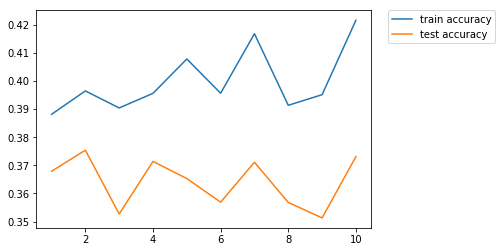

In [14]:
plt.plot(epoch_list,trn_accuracy,label="train accuracy")
plt.plot(epoch_list,tst_accuracy,label="test accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

[1,  2000] loss: 1.852
[1,  4000] loss: 1.713
[1,  6000] loss: 1.656
[1,  8000] loss: 1.632
[1, 10000] loss: 1.594
[1, 12000] loss: 1.569
[2,  2000] loss: 1.515
[2,  4000] loss: 1.513
[2,  6000] loss: 1.520
[2,  8000] loss: 1.514
[2, 10000] loss: 1.490
[2, 12000] loss: 1.511
[3,  2000] loss: 1.418
[3,  4000] loss: 1.451
[3,  6000] loss: 1.440
[3,  8000] loss: 1.441
[3, 10000] loss: 1.428
[3, 12000] loss: 1.446
[4,  2000] loss: 1.363
[4,  4000] loss: 1.375
[4,  6000] loss: 1.401
[4,  8000] loss: 1.391
[4, 10000] loss: 1.391
[4, 12000] loss: 1.402
[5,  2000] loss: 1.305
[5,  4000] loss: 1.370
[5,  6000] loss: 1.327
[5,  8000] loss: 1.335
[5, 10000] loss: 1.371
[5, 12000] loss: 1.326
[6,  2000] loss: 1.262
[6,  4000] loss: 1.305
[6,  6000] loss: 1.306
[6,  8000] loss: 1.324
[6, 10000] loss: 1.299
[6, 12000] loss: 1.340
[7,  2000] loss: 1.225
[7,  4000] loss: 1.231
[7,  6000] loss: 1.279
[7,  8000] loss: 1.287
[7, 10000] loss: 1.319
[7, 12000] loss: 1.283
[8,  2000] loss: 1.210
[8,  4000] 

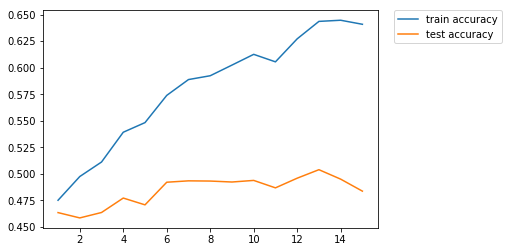

In [19]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class Net_2(nn.Module):
    def __init__(self):
        super(Net_2, self).__init__()
        # there are two layers and both are linear
        self.fc1 = nn.Linear(32 * 32 * 3, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, 32 * 32 * 3)
        # an ReLu is applied after the first layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
net_2 = Net_2()

def trn_tst_accuracy(train,test,net):
    trn_correct = 0
    trn_total = 0
    with torch.no_grad():
        for data in train:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            trn_total += labels.size(0)
            trn_correct += (predicted == labels).sum().item()
    tst_correct = 0
    tst_total = 0
    with torch.no_grad():
        for data in test:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            tst_total += labels.size(0)
            tst_correct += (predicted == labels).sum().item()
    return trn_correct/trn_total,tst_correct/tst_total

def training(net, rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=rate, momentum=0.9)
    trn_accuracy = []
    tst_accuracy = []
    epoch_list = []
    for epoch in range(15):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
        epoch_list.append(epoch+1)
        tmp1, tmp2 = trn_tst_accuracy(trainloader,testloader,net)
        trn_accuracy.append(tmp1)
        tst_accuracy.append(tmp2)

    print('Finished Training')
    return trn_accuracy,tst_accuracy,epoch_list

trn_accuracy, tst_accuracy, epoch_list = training(net_2,0.001)
plt.plot(epoch_list,trn_accuracy,label="train accuracy")
plt.plot(epoch_list,tst_accuracy,label="test accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [21]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class Net_3(nn.Module):
    def __init__(self):
        super(Net_3, self).__init__()
        # there are three layers. We first apply a convolution followed by a 2 by 2 pooling
        self.conv1 = nn.Conv2d(3, 100, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(14 * 14 * 100, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 14 * 14 * 100)
        x = self.fc1(x)
        return x
    
net_3 = Net_3()

def trn_tst_accuracy(train,test,net):
    trn_correct = 0
    trn_total = 0
    with torch.no_grad():
        for data in train:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            trn_total += labels.size(0)
            trn_correct += (predicted == labels).sum().item()
    tst_correct = 0
    tst_total = 0
    with torch.no_grad():
        for data in test:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            tst_total += labels.size(0)
            tst_correct += (predicted == labels).sum().item()
    return trn_correct/trn_total,tst_correct/tst_total

def training(net, rate):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=rate, momentum=0.9)
    trn_accuracy = []
    tst_accuracy = []
    epoch_list = []
    for epoch in range(15):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
        epoch_list.append(epoch+1)
        tmp1, tmp2 = trn_tst_accuracy(trainloader,testloader,net)
        trn_accuracy.append(tmp1)
        tst_accuracy.append(tmp2)

    print('Finished Training')
    return trn_accuracy,tst_accuracy,epoch_list

trn_accuracy, tst_accuracy, epoch_list = training(net_3,0.001)
plt.plot(epoch_list,trn_accuracy,label="train accuracy")
plt.plot(epoch_list,tst_accuracy,label="test accuracy")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

[1,  2000] loss: 1.650
[1,  4000] loss: 1.434
[1,  6000] loss: 1.301
[1,  8000] loss: 1.275
[1, 10000] loss: 1.192
[1, 12000] loss: 1.213


Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/anaconda3/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 